COVID-19

1. Check the dimensions of the dataset and the labels present in the header.

In [1]:
import pandas as pd
import humanize as hz
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
current_work_directory = os.getcwd()

In [3]:
covid_filepath = os.path.join(current_work_directory,
                            "File",
                            "owid-covid-data.csv")
covid_filepath

'c:\\Users\\laura\\Desktop\\VisualStudioCode\\Epicode Jupyter Notebook\\File\\owid-covid-data.csv'

In [4]:
df_covid_iniziale = pd.read_csv("File\\owid-covid-data.csv", low_memory=False)

In [5]:
df_covid_iniziale["date"] = pd.to_datetime(df_covid_iniziale["date"])

In [6]:
df_covid_iniziale["year"] = df_covid_iniziale["date"].dt.year

In [7]:
df_covid_iniziale["date"] = df_covid_iniziale["date"].astype(str)

In [8]:
df_covid_iniziale.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
year                                         int32
Length: 68, dtype: object

In [9]:
df_covid_iniziale["year"] = df_covid_iniziale["year"].astype(str)

In [10]:
df_covid = df_covid_iniziale

In [11]:
df_covid.size

25636476

In [12]:
df_covid.shape

(377007, 68)

In [13]:
df_covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [14]:
df_covid.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020


In [15]:
df_covid.sample(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year
316119,KOR,Asia,South Korea,2023-11-13,34571873.0,0.0,0.000,35934.0,0.0,0.000,...,NaN,12.27,83.03,0.916,51815808.0,NaN,NaN,NaN,NaN,2023
284222,LCA,North America,Saint Lucia,2021-10-22,12175.0,0.0,33.286,233.0,0.0,1.571,...,87.202,1.30,76.20,0.759,179872.0,NaN,NaN,NaN,NaN,2021
16944,ABW,North America,Aruba,2021-06-16,11069.0,0.0,7.286,107.0,0.0,0.000,...,NaN,NaN,76.29,NaN,106459.0,NaN,NaN,NaN,NaN,2021
107904,FRO,Europe,Faeroe Islands,2021-04-02,664.0,0.0,0.000,1.0,0.0,0.000,...,NaN,NaN,80.67,NaN,53117.0,NaN,NaN,NaN,NaN,2021
320524,LKA,Asia,Sri Lanka,2023-09-03,672579.0,2.0,0.286,16882.0,0.0,0.000,...,NaN,3.60,76.98,0.782,21832150.0,NaN,NaN,NaN,NaN,2023
367207,VNM,Asia,Vietnam,2021-01-09,1494.0,0.0,7.714,35.0,0.0,0.000,...,85.847,2.60,75.40,0.704,98186856.0,NaN,NaN,NaN,NaN,2021
367718,VNM,Asia,Vietnam,2022-06-04,10717251.0,0.0,1194.857,43078.0,0.0,0.429,...,85.847,2.60,75.40,0.704,98186856.0,NaN,NaN,NaN,NaN,2022
23823,AZE,Asia,Azerbaijan,2023-11-21,834038.0,0.0,3.000,10353.0,0.0,0.000,...,83.241,4.70,73.00,0.756,10358078.0,NaN,NaN,NaN,NaN,2023
132596,GLP,North America,Guadeloupe,2023-06-13,202836.0,0.0,0.000,1017.0,0.0,0.000,...,NaN,NaN,82.14,NaN,395762.0,NaN,NaN,NaN,NaN,2023
172506,KIR,Oceania,Kiribati,2022-04-30,3076.0,0.0,1.000,13.0,0.0,0.000,...,NaN,1.90,68.37,0.630,131237.0,NaN,NaN,NaN,NaN,2022


In [16]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377007 entries, 0 to 377006
Data columns (total 68 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    377007 non-null  object 
 1   continent                                   358941 non-null  object 
 2   location                                    377007 non-null  object 
 3   date                                        377007 non-null  object 
 4   total_cases                                 338085 non-null  float64
 5   new_cases                                   366116 non-null  float64
 6   new_cases_smoothed                          364886 non-null  float64
 7   total_deaths                                316113 non-null  float64
 8   new_deaths                                  366124 non-null  float64
 9   new_deaths_smoothed                         364894 non-null  float64
 

In [17]:
pd.set_option("display.float_format", lambda x: '%.2f' % x)
df_covid.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,338085.00,366116.00,364886.00,316113.00,366124.00,364894.00,338085.00,366116.00,364886.00,316113.00,...,216629.00,143293.00,258405.00,347067.00,283747.00,377007.00,13042.00,13042.00,13042.00,13042.00
mean,7202761.68,8965.88,8995.88,88906.12,79.76,80.03,109569.89,136.21,136.66,906.06,...,32.91,50.79,3.10,73.71,0.72,129343523.18,54026.98,9.73,11.05,1755.73
std,43146866.21,243004.83,91623.90,452264.53,1444.17,541.72,157821.15,1565.44,579.01,1123.61,...,13.57,31.95,2.55,7.40,0.15,663675555.53,150203.88,11.99,24.60,1981.14
min,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7.70,1.19,0.10,53.28,0.39,47.00,-37726.10,-44.23,-95.92,-2936.45
25%,9106.00,0.00,0.14,133.00,0.00,0.00,2861.38,0.00,0.00,64.65,...,22.60,20.86,1.30,69.59,0.60,449002.00,165.03,1.91,-1.47,107.91
50%,76764.00,0.00,19.57,1369.00,0.00,0.14,31845.40,0.00,4.96,402.20,...,33.10,49.84,2.50,75.05,0.74,5882259.00,6662.50,8.12,5.68,1226.75
75%,832044.00,0.00,433.29,12250.00,0.00,4.29,151421.86,0.00,72.60,1445.08,...,41.30,82.50,4.20,79.46,0.83,28301700.00,38695.05,15.06,15.76,2856.92
max,774493392.00,44236227.00,6319461.00,7026534.00,103719.00,14817.00,763475.44,240325.87,34332.27,6507.66,...,78.10,100.00,13.80,86.75,0.96,7975105024.00,1327828.10,76.62,377.70,10293.51


2. For each continent, find the total number of cases that occurred in that same continent; do not consider any locations in the dataset that do not belong to any continent.

In [18]:
df_covid["continent"].value_counts()

continent
Africa           85045
Europe           81489
Asia             74487
North America    61208
Oceania          35820
South America    20892
Name: count, dtype: int64

In [19]:
df_covid["continent"].isna().any()

True

In [20]:
covid_null = df_covid["continent"].isnull()
covid_null.sum()

18066

In [21]:
df_covid = df_covid.dropna(subset=["continent"])

In [22]:
total_cases_continent = df_covid.groupby("continent")["new_cases"].sum().reset_index()
total_cases_continent["cases_continent"] = total_cases_continent["new_cases"].apply(hz.intword)

In [23]:
total_cases_continent[["continent", "cases_continent"]]

,continent,cases_continent
0,Africa,13.1 million
1,Asia,301.4 million
2,Europe,252.0 million
3,North America,124.5 million
4,Oceania,14.7 million
5,South America,68.8 million


In [24]:
df_group_continent_year = df_covid.groupby(["continent", "year"])["new_cases"].sum().reset_index()

In [25]:
df_group_continent_year["cumulative_new_cases"] = df_group_continent_year.groupby("continent")["new_cases"].cumsum()

<Axes: xlabel='year', ylabel='cumulative_new_cases'>

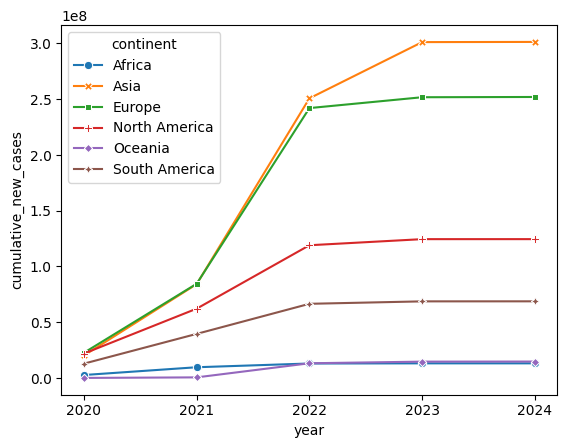

In [26]:
sns.lineplot(data=df_group_continent_year, x="year", y="cumulative_new_cases", hue="continent",style="continent", markers=True, dashes=False)

3. Regarding the total COVID cases, develop a function that takes as input the dataset and two continent names, and compares the following relative statistical descriptors: minimum and maximum values, mean, and percentage relative to the total number of cases worldwide (also calculated on locations without indication of continent).

In [28]:
df_covid["new_cases"].sum()

774561579.0

In [29]:
df_covid_iniziale["new_cases"].sum()

3282553220.0

In [30]:
def comparison_stat_values(dataset, continent1, continent2):

    df_covid = dataset.dropna(subset=["continent"])

    total_cases_worldwide = df_covid_iniziale["new_cases"].sum()                      
    
    df_continent1 = df_covid[df_covid["continent"] == continent1]
    df_continent2 = df_covid[df_covid["continent"] == continent2]

    
    values_continent1 = {
        "Min": df_continent1["new_cases"].min(),
        "Daily Max": df_continent1["new_cases"].max(),          
        "Max": df_continent1["total_cases"].max(),
        "Daily Mean": df_continent1["new_cases"].mean(),      
        "Mean": df_continent1["total_cases"].mean(),
        "Percentage_worldwide": (df_continent1["new_cases"].sum() / total_cases_worldwide) * 100
    }

    values_continent2 = {
        "Min": df_continent2["new_cases"].min(),
        "Daily Max": df_continent2["new_cases"].max(),          
        "Max": df_continent2["total_cases"].max(),
        "Daily Mean": df_continent2["new_cases"].mean(),      
        "Mean": df_continent2["total_cases"].mean(),
        "Percentage_worldwide": (df_continent2["new_cases"].sum() / total_cases_worldwide) * 100
    }

    
    return values_continent1, values_continent2


In [31]:
continent1 = "Europe"
continent2 = "Asia"

comparison_stat_values(df_covid, continent1, continent2)

({'Min': 0.0,
  'Daily Max': 2417043.0,
  'Max': 38997490.0,
  'Daily Mean': 3339.960373207517,
  'Mean': 2602675.778776635,
  'Percentage_worldwide': 7.677358236403552},
 {'Min': 0.0,
  'Daily Max': 40475477.0,
  'Max': 99329249.0,
  'Daily Mean': 4298.158525976526,
  'Mean': 3079394.3003714457,
  'Percentage_worldwide': 9.181608150743099})

In [32]:
values = pd.DataFrame(comparison_stat_values(df_covid, continent1, continent2), index=["Europe", "Asia"])
values.round(2)

,Min,Daily Max,Max,Daily Mean,Mean,Percentage_worldwide
Europe,0.00,2417043.00,38997490.00,3339.96,2602675.78,7.68
Asia,0.00,40475477.00,99329249.00,4298.16,3079394.30,9.18


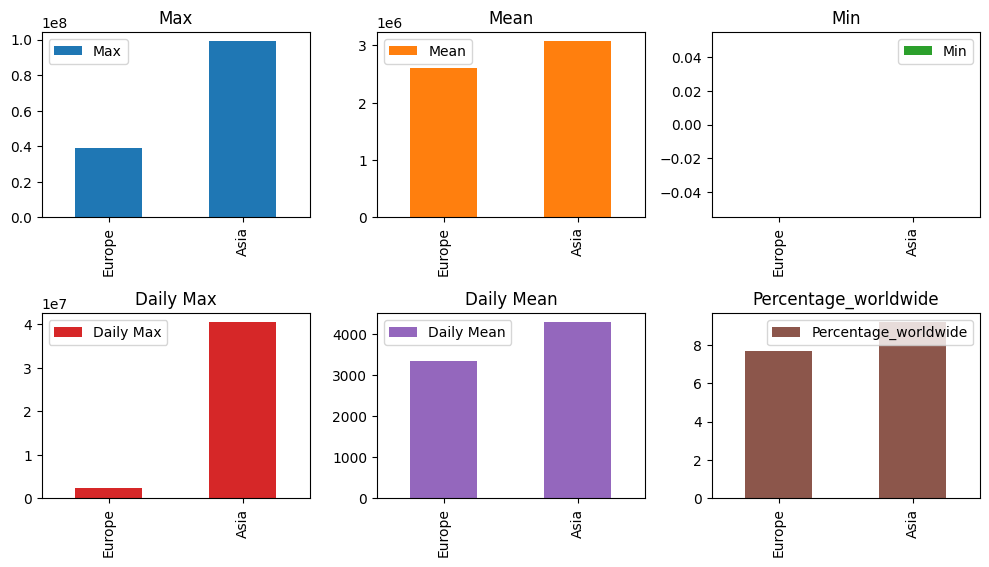

In [33]:
metrics = ["Max", "Mean", "Min", "Daily Max", "Daily Mean", "Percentage_worldwide"]

values[metrics].plot(kind="bar", subplots=True, layout=(3, 3), figsize=(10, 8), sharex=False)

plt.tight_layout()
plt.show()

4. Perform the same type of analysis - also in this case by developing an ad hoc function - for the total number of vaccinations for each continent.

In [34]:
total_vacc_continent = df_covid.groupby("continent")["new_vaccinations"].sum().reset_index()
total_vacc_continent["total_vacc"] = total_vacc_continent["new_vaccinations"].apply(hz.intword)

In [35]:
total_vacc_continent[["continent", "total_vacc"]]

,continent,total_vacc
0,Africa,117.4 million
1,Asia,7.6 billion
2,Europe,1.3 billion
3,North America,1.0 billion
4,Oceania,74.8 million
5,South America,846.4 million


In [36]:
df_group_vaccine_year = df_covid.groupby(["continent", "year"])["new_vaccinations"].sum().reset_index()

In [37]:
df_group_vaccine_year["cumulative_new_vaccine"] = df_group_vaccine_year.groupby("continent")["new_vaccinations"].cumsum()

<Axes: xlabel='year', ylabel='cumulative_new_vaccine'>

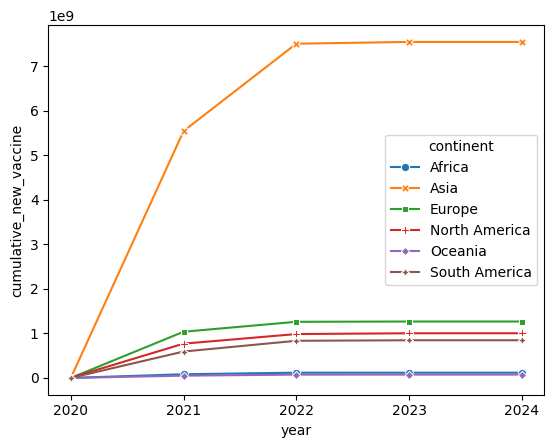

In [38]:
sns.lineplot(data=df_group_vaccine_year, x="year", y="cumulative_new_vaccine", hue="continent",style="continent", markers=True, dashes=False)

In [43]:
df_covid["new_vaccinations"].sum()

10860147918.0

In [44]:
df_covid_iniziale["new_vaccinations"].sum()

52492183769.0

In [45]:
def comparison_vaccinations(dataset, list_continent):

    df_covid = dataset.dropna(subset=["continent"])

    
    total_vaccines_worldwide = df_covid_iniziale["new_vaccinations"].sum()  

    result_continents = {}

    for continent in list_continent:
        df_continent = df_covid[df_covid["continent"] == continent]
        values_continent = {
            "Min": df_continent["new_vaccinations"].min(),
            "Daily Max": df_continent["new_vaccinations"].max(),             
            "Max": df_continent["total_vaccinations"].max(),
            "Daily Mean": df_continent["new_vaccinations"].mean(),    
            "Mean": df_continent["total_vaccinations"].mean(),
            "Percentage_worldwide": (df_continent["new_vaccinations"].sum() / total_vaccines_worldwide) * 100
        }

        result_continents[continent] = values_continent


    return result_continents

In [46]:
list_continents = df_covid["continent"].unique()
list_continents

array(['Asia', 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [47]:
comparison_vaccinations(df_covid, list_continents)

{'Asia': {'Min': 0.0,
  'Daily Max': 24741000.0,
  'Max': 3491077000.0,
  'Daily Mean': 484249.7567342227,
  'Mean': 230825554.58455628,
  'Percentage_worldwide': 14.383898067999617},
 'Europe': {'Min': 0.0,
  'Daily Max': 2389472.0,
  'Max': 192221468.0,
  'Daily Mean': 55127.706345409475,
  'Mean': 27273581.526325688,
  'Percentage_worldwide': 2.414743035988094},
 'Africa': {'Min': 0.0,
  'Daily Max': 1866822.0,
  'Max': 133048021.0,
  'Daily Mean': 42203.190938511325,
  'Mean': 8012152.22106591,
  'Percentage_worldwide': 0.22358961958315934},
 'Oceania': {'Min': 1.0,
  'Daily Max': 351226.0,
  'Max': 69306345.0,
  'Daily Mean': 55957.982797307406,
  'Mean': 12617372.973786408,
  'Percentage_worldwide': 0.14252754910948007},
 'North America': {'Min': 0.0,
  'Daily Max': 7246123.0,
  'Max': 676728782.0,
  'Daily Mean': 161899.7748023875,
  'Mean': 64720903.87429155,
  'Percentage_worldwide': 1.9119355148503083},
 'South America': {'Min': 1.0,
  'Daily Max': 3976605.0,
  'Max': 4864364

In [48]:
df_plot_vacc = pd.DataFrame(comparison_vaccinations(df_covid, list_continents))
df_plot_vacc

,Asia,Europe,Africa,Oceania,North America,South America
Min,0.00,0.00,0.00,1.00,0.00,1.00
Daily Max,24741000.00,2389472.00,1866822.00,351226.00,7246123.00,3976605.00
Max,3491077000.00,192221468.00,133048021.00,69306345.00,676728782.00,486436436.00
Daily Mean,484249.76,55127.71,42203.19,55957.98,161899.77,141700.11
Mean,230825554.58,27273581.53,8012152.22,12617372.97,64720903.87,65958353.54
Percentage_worldwide,14.38,2.41,0.22,0.14,1.91,1.61


In [49]:
df_plot_vacc = df_plot_vacc.T

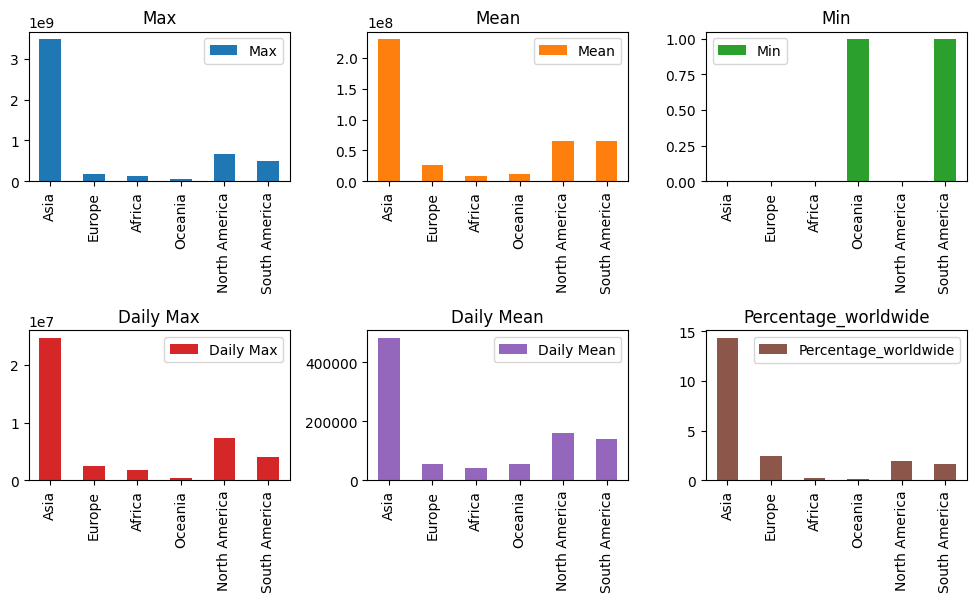

In [50]:
metrics = ["Max", "Mean", "Min", "Daily Max", "Daily Mean", "Percentage_worldwide"]

df_plot_vacc[metrics].plot(kind="bar", subplots=True, layout=(3, 3), figsize=(10, 8), sharex=False)

plt.tight_layout()
plt.show()

In [51]:
continent1 = "Europe"
continent2 = "South America"


df_europe_samerica = pd.DataFrame(comparison_stat_values(df_covid, continent1, continent2), index=["Europe", "South America"])
df_europe_samerica.round(2)

,Min,Daily Max,Max,Daily Mean,Mean,Percentage_worldwide
Europe,0.00,2417043.00,38997490.00,3339.96,2602675.78,7.68
South America,0.00,1283024.00,37519960.00,3291.65,3056576.17,2.09


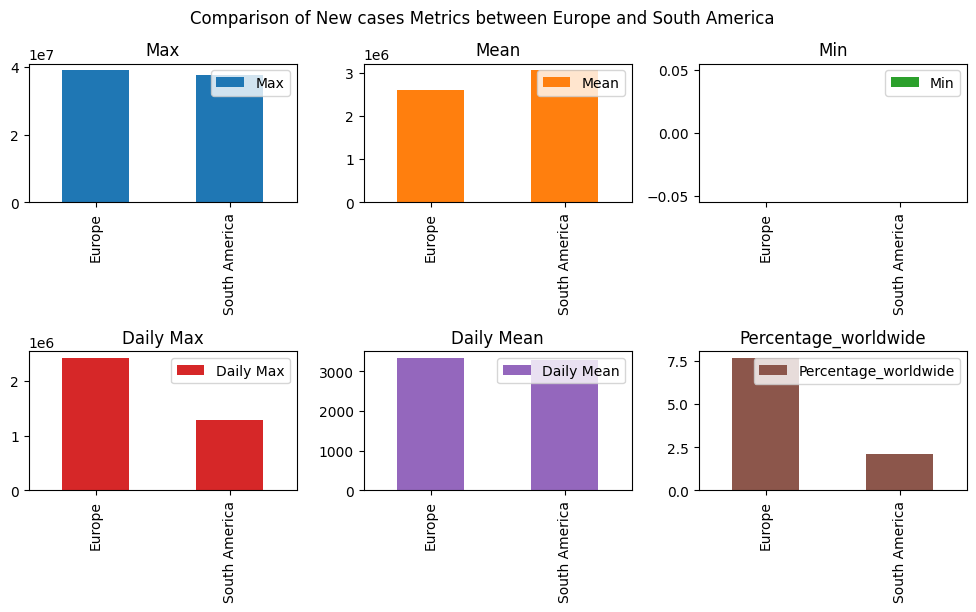

In [61]:
metrics = ["Max", "Mean", "Min", "Daily Max", "Daily Mean", "Percentage_worldwide"]

df_europe_samerica[metrics].plot(kind="bar", subplots=True, layout=(3, 3), figsize=(10, 8), sharex=False)

plt.suptitle("Comparison of New cases Metrics between Europe and South America")
plt.tight_layout()
plt.show()

In [53]:
continent1 = "Oceania"
continent2 = "South America"

df_oceania_samerica = pd.DataFrame(comparison_stat_values(df_covid, continent1, continent2), index=["Oceania", "South America"])
df_oceania_samerica.round(2)

,Min,Daily Max,Max,Daily Mean,Mean,Percentage_worldwide
Oceania,0.00,588813.00,11769858.00,411.72,355420.46,0.45
South America,0.00,1283024.00,37519960.00,3291.65,3056576.17,2.09


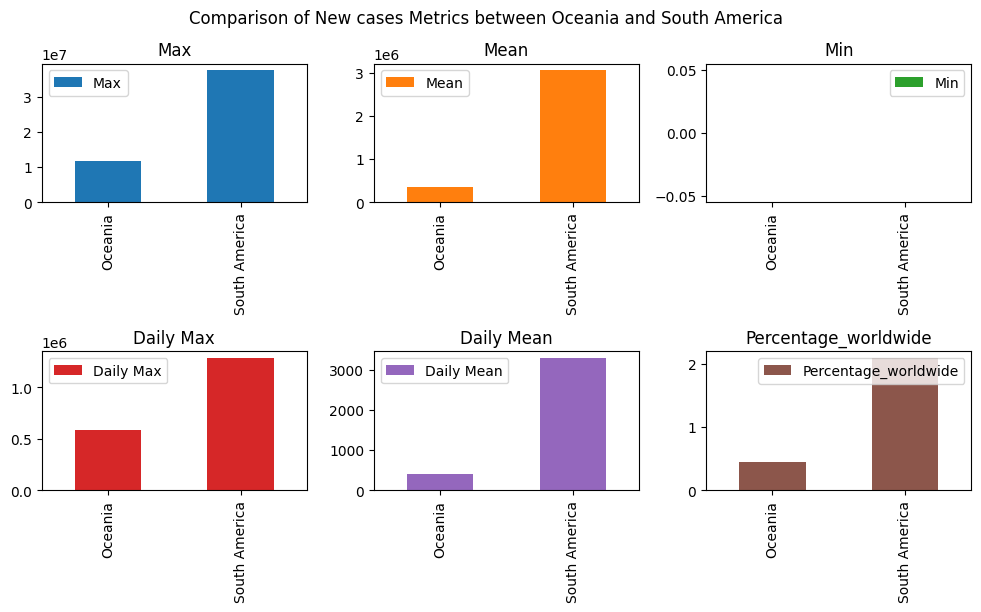

In [60]:
metrics = ["Max", "Mean", "Min", "Daily Max", "Daily Mean", "Percentage_worldwide"]

df_oceania_samerica[metrics].plot(kind="bar", subplots=True, layout=(3, 3), figsize=(10, 8), sharex=False)

plt.suptitle("Comparison of New cases Metrics between Oceania and South America")
plt.tight_layout()
plt.show()

In [55]:
continent1 = "Europe"
continent2 = "Oceania"

df_europe_oceania = pd.DataFrame(comparison_stat_values(df_covid, continent1, continent2), index=["Europe", "Oceania"])
df_europe_oceania.round(2)

,Min,Daily Max,Max,Daily Mean,Mean,Percentage_worldwide
Europe,0.00,2417043.00,38997490.00,3339.96,2602675.78,7.68
Oceania,0.00,588813.00,11769858.00,411.72,355420.46,0.45


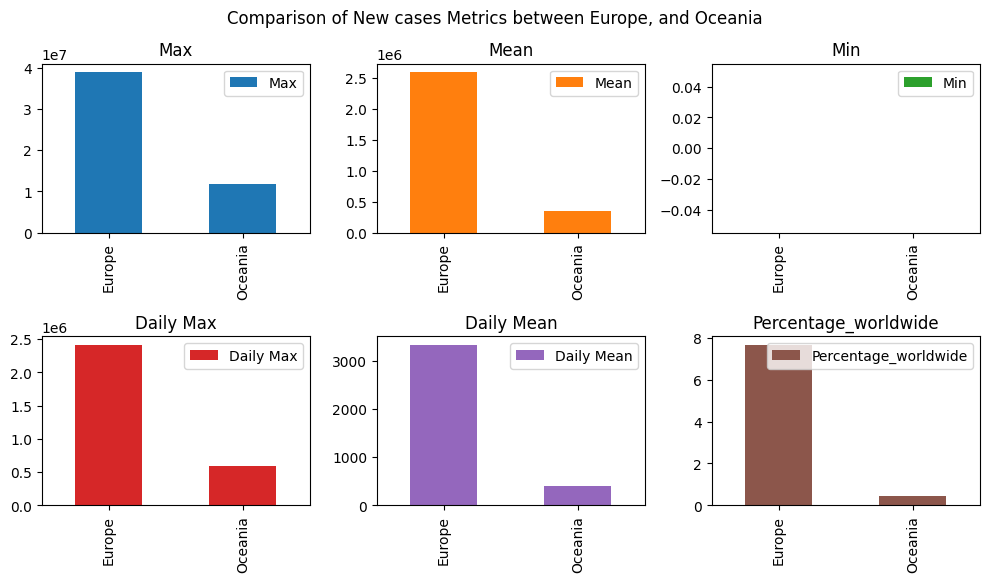

In [59]:
metrics = ["Max", "Mean", "Min", "Daily Max", "Daily Mean", "Percentage_worldwide"]

df_europe_oceania[metrics].plot(kind="bar", subplots=True, layout=(3, 3), figsize=(10, 8), sharex=False)

plt.suptitle("Comparison of New cases Metrics between Europe, and Oceania")
plt.tight_layout()
plt.show()

In [57]:
list_continents = ["Europe", "Oceania", "South America"]
df_vacc_eu_sameric_oceania = pd.DataFrame(comparison_vaccinations(df_covid, list_continents))
df_vacc_eu_sameric_oceania = df_vacc_eu_sameric_oceania.T
df_vacc_eu_sameric_oceania

,Min,Daily Max,Max,Daily Mean,Mean,Percentage_worldwide
Europe,0.00,2389472.00,192221468.00,55127.71,27273581.53,2.41
Oceania,1.00,351226.00,69306345.00,55957.98,12617372.97,0.14
South America,1.00,3976605.00,486436436.00,141700.11,65958353.54,1.61


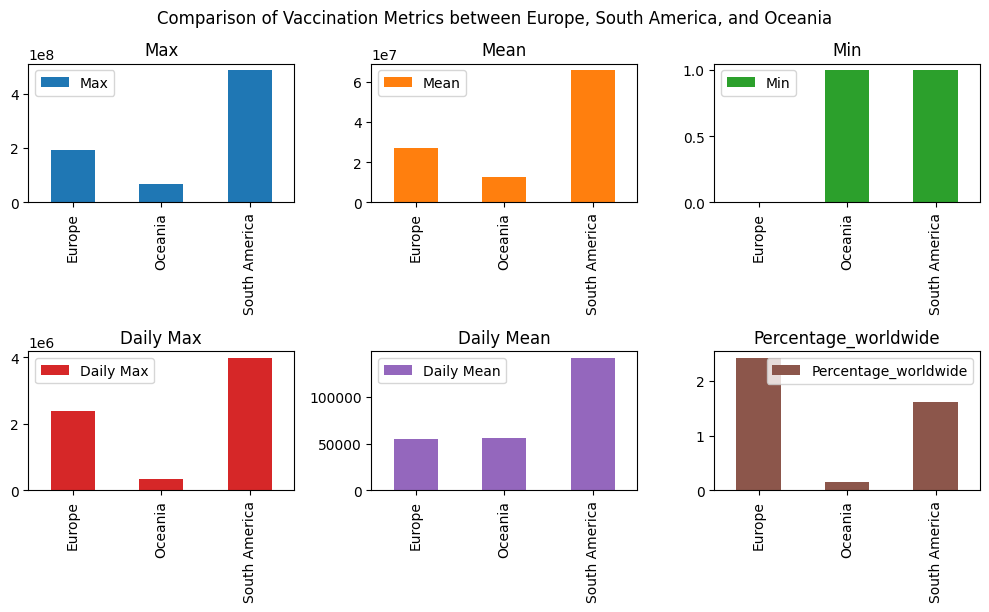

In [58]:
metrics = ["Max", "Mean", "Min", "Daily Max", "Daily Mean", "Percentage_worldwide"]

df_vacc_eu_sameric_oceania[metrics].plot(kind="bar", subplots=True, layout=(3, 3), figsize=(10, 8), sharex=False)

plt.suptitle("Comparison of Vaccination Metrics between Europe, South America, and Oceania")
plt.tight_layout()
plt.show()